In [7]:
import spacy
from IPython.display import SVG
from spacy import displacy

# Intro to spaCy
We'll finish up our course by looking at `spaCy`, a great Python library for working with natural language processing. While most of the tools we've used so far have been rule-based, spaCy consists mostly of **statistical NLP** models. In statistical models, a large corpus of text is processed and mathematical methods are used to identify patterns in the corpus. This process is called **training**. Once a model has been trained, we can use it to analyze new text. 

spaCy comes with several pre-trained models, meaning that we can quickly load a model which has been trained on large amounts of data. This way, we can take advantage of work which has already been done by spaCy developers and focus on our own NLP tasks. In these notebooks, we'll see how combining spaCy's statistical models with rule-based systems offers a powerful way to process and analyze text.

## What we'll do today

We'll start by looking at the basic usage of spaCy. Next, we'll focus on specific NLP task, **named entity recognition (NER)**, and see how this works in spaCy, as well as some of the limitations with clinical data. Some of these limitations can be addressed by writing our own rules for concept extraction, and we'll practice that with some clinical texts. We'll then go a little deeper into how spaCy's models are implemented and how we can modify them. Finally, we'll end the day by spaCy models which were designed specifically for use in the biomedical domain.

# spaCy documentation

spaCy has great documentation. As we're going along today, try browsing through their documentation to find examples and instructions. Start by opening up these two pages and navigating through the documentation:

[Basic spaCy usage](https://spacy.io/usage/models)

[API documentation](https://spacy.io/api)


# Basic usage of spaCy


In this notebook, we'll look at the basic fundamentals of spaCy:
- Main classes in spaCy
- Linguistic attributes available as part of default text processing
- Coding exercise

## How to use spaCy
At a high-level, here are the steps for using spaCy:
- Start by loading a pre-trained NLP model
- Process a string of text with the model
- Use the attributes in our processed documents for downstream NLP tasks like NER or document classification

For example, here's a very short example of how this works. For the sake of demonstration, we'll use this snippet of a recent, exciting news article:

In [4]:
# First, load a pre-trained model
nlp = spacy.load("en_core_web_sm")

In [6]:
# Process a string of text with the model
text = """Taco Bell’s latest marketing venture, a pop-up hotel, opened at 10 a.m. Pacific Time Thursday. 
The rooms sold out within two minutes.
The resort has been called “The Bell: A Taco Bell Hotel and Resort.” It’s located in Palm Springs, California."""

doc = nlp(text)
doc

Taco Bell’s latest marketing venture, a pop-up hotel, opened at 10 a.m. Pacific Time Thursday. 
The rooms sold out within two minutes.
The resort has been called “The Bell: A Taco Bell Hotel and Resort.” It’s located in Palm Springs, California.

In [8]:
# Use the attributes in our processed documents for downstream NLP tasks
# Here, we'll visualize the entities in this text identified through NER
displacy.render(doc, style="ent")

Let's dive a little deeper into how spaCy is structured and what we have to work with.

## spaCy architecture
The following diagram from spaCy's API documentation shows a basic overview of spaCy's architecture:

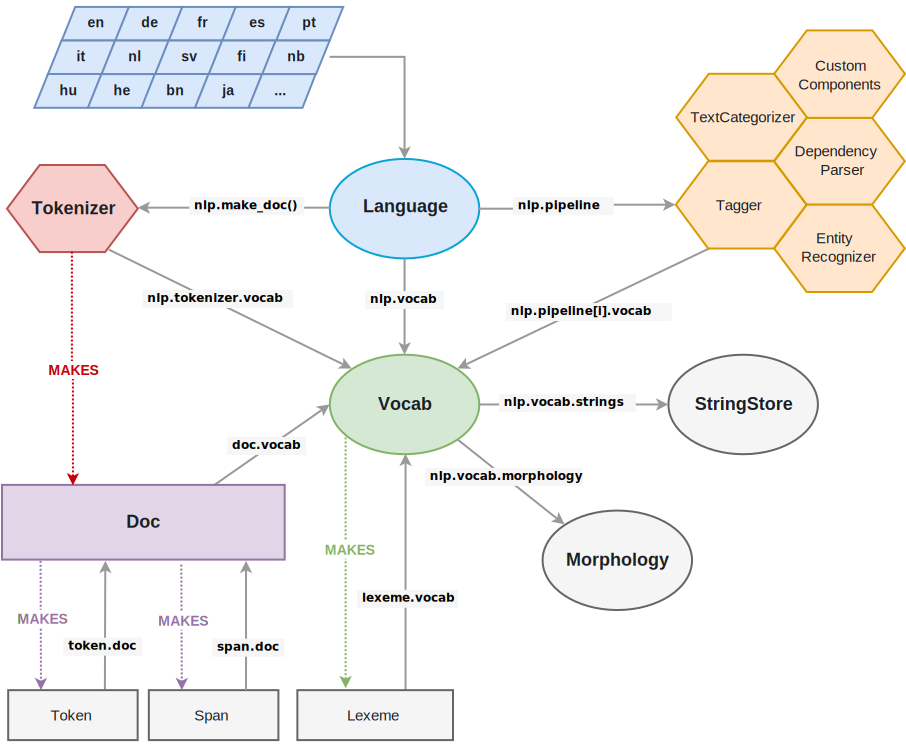

In [10]:
SVG('./images/spacy_architecture.svg')

There's a lot of information in this diagram, so we'll start small by focusing on these 4 spaCy classes:
- `Language`: The NLP model used to process text
- `Doc`: A sequence of text which has been processed by a `Language` object
- `Token`: A single word or symbol in a Doc
- `Span`: A slice from a Doc

# `Language` class
The `nlp` object in spaCy is the linguistic model which will be used for processing text. We instantiate a `Language` class by providing the name of a pre-trained model which we wish to use. We typically name this object `nlp`, and this will be our primary entry point.


Statistical, pre-trained, explain more

In [10]:
nlp = spacy.load("en_core_web_sm")
nlp

In [ ]:
help(nlp)

The `nlp` model we instantiated above is a **small** ("sm"), **English** ("en")-language model trained on **web** ("web") data, but there are currently 16 different models from 9 different languages. See the [spaCy documentation](https://spacy.io/usage/models) for more information on each of the models.

# Documents, spans and tokens
The `nlp` object is what we'll be using to process text. The next few classes represent the output of our NLP model.

## `Doc` class
The `doc` object represents a single document of text. To create a `doc` object, we call `nlp` on a string of text. This runs that text through a spaCy pipeline, which we'll learn more about in a future notebook.

In [12]:
text = 'Taco Bell’s latest marketing venture, a pop-up hotel, opened at 10 a.m. Pacific Time Thursday.'

In [13]:
doc = nlp(text)

In [14]:
print(doc)

Taco Bell’s latest marketing venture, a pop-up hotel, opened at 10 a.m. Pacific Time Thursday.


## Tokens and Spans
A `Token` is a single word, symbol, or whitespace in a `doc`. When we create a `doc` object, the text broken up into individual tokens. This is called **"tokenization"**.

**Discussion**: Look at the tokens generated from this text snippet. What can you say about the tokenization method? Is it as simple as splitting up into words every time we reach a whitespace?

In [15]:
token = doc[0]

In [16]:
token

Taco

In [17]:
type(token)

spacy.tokens.token.Token

In [18]:
for token in doc:
    print(token)

Taco
Bell
’s
latest
marketing
venture
,
a
pop
-
up
hotel
,
opened
at
10
a.m.
Pacific
Time
Thursday
.


A `Span` is a slice of a document, or a consecutive sequence of tokens.

In [19]:
span = doc[1:4]

In [20]:
span

Bell’s latest

In [21]:
type(span)

spacy.tokens.span.Span

## Linguistic Attributes
Because spaCy comes with pre-trained linguistic models, when we call `nlp` on a text we have access to a number of linguistic attributes in the `doc` or `token` objects:

- Part-of-speech (POS) tagging
- Morphology
- Dependency Parsing
- Named entity recognition
- Sentence splitting
- Others

In [22]:
nlp.pipe_names

['tagger', 'parser', 'ner']

### POS Tagging
Parts of speech are categories of words. For example, "nouns", "verbs", and "adjectives" are all examples of parts of speech. Assigning parts of speech to words is useful for downstream NLP texts such as word sense disambiguation and named entity recognition.

**Discussion**: What to the POS tags below mean?

In [23]:
print(f"Token -> POS\n")
for token in doc:
    print(f"{token.text} -> {token.pos_}")

Token -> POS

Taco -> PROPN
Bell -> PROPN
’s -> PROPN
latest -> ADJ
marketing -> NOUN
venture -> NOUN
, -> PUNCT
a -> DET
pop -> NOUN
- -> PUNCT
up -> PART
hotel -> NOUN
, -> PUNCT
opened -> VERB
at -> ADP
10 -> NUM
a.m. -> NOUN
Pacific -> PROPN
Time -> PROPN
Thursday -> PROPN
. -> PUNCT


In [24]:
spacy.explain("PROPN")

'proper noun'

### Morphology
The morphology of a word refers to the form of a word. For example, "eat", "eats", and "ate" are all different inflections of the word "eat". We would say that "eat" is the **lemma** of all of these words.

In [26]:
print(f"Token -> Lemma\n")
for token in doc:
    print(f"{token.text} -> {token.lemma_}")

Token -> Lemma

Taco -> Taco
Bell -> Bell
’s -> ’s
latest -> late
marketing -> marketing
venture -> venture
, -> ,
a -> a
pop -> pop
- -> -
up -> up
hotel -> hotel
, -> ,
opened -> open
at -> at
10 -> 10
a.m. -> a.m.
Pacific -> Pacific
Time -> Time
Thursday -> Thursday
. -> .


### Dependency Parsing
In dependency parsing, we analyze the structure of a sentence. We won't spend too much time on this, but here is a nice visualization of dependency parse looks like. Take a minute to look at the arrows between words and try to figure out what they mean.

In [15]:
doc = nlp("The cat sat on the green mat")

In [16]:
displacy.render(doc, style='dep')

### Other attributes
Look at spaCy's [Token class documentation](https://spacy.io/api/token) for a full list of additional attributes available for each token in a document. We'll print out a few more.

**Discussion**: How can these attributes be useful in downstream NLP tasks?

In [30]:
doc = nlp("Bitcoin rose 7.9% to $11,899 as of 11:53 a.m. in New York on Monday. "
    "https://www.bloomberg.com/news/articles/2019-07-08/bitcoin-breakout-may-be-ahead-as-technicals-show-rally-extension")

In [31]:
print(doc)

Bitcoin rose 7.9% to $11,899 as of 11:53 a.m. in New York on Monday. https://www.bloomberg.com/news/articles/2019-07-08/bitcoin-breakout-may-be-ahead-as-technicals-show-rally-extension


The "shape" of the token:

In [32]:
print(doc[0])
print(doc[0].shape_)

Bitcoin
Xxxxx


The vector of a token (we'll learn more about this in the upcoming [statistical NLP class](https://datascience4health.bmi.utah.edu/statistical-nlp/) ).

In [18]:
token = doc[0]

In [19]:
token.vector

array([-4.2791505 , -3.6231017 , -4.038311  ,  1.621927  ,  0.33003563,
       -0.36835814, -1.1787496 , -0.9574218 , -2.3754406 , -2.1553    ,
        2.015212  ,  3.8695936 , -3.4196744 , -0.59352744, -1.4212173 ,
       -2.6224658 , -0.18970647,  0.37852868,  4.6692142 ,  1.710747  ,
        1.1691847 , -2.792294  ,  2.933097  ,  4.125014  , -0.6041511 ,
        3.328246  ,  0.03704858, -4.797726  ,  1.6109418 ,  4.148142  ,
        4.0968904 , -1.550179  , -1.1174474 , -4.7082205 , -1.8186622 ,
       -4.225642  ,  5.0690312 ,  2.8283648 , -3.0518012 ,  2.710712  ,
       -1.4477763 , -0.95311993, -3.5241623 ,  1.0967116 , -2.4924178 ,
       -2.7999656 ,  1.5899887 , -3.786115  ,  2.8625512 , -2.3767047 ,
       -0.02440187, -2.2565053 , -4.7382507 , -1.1424143 ,  2.7950048 ,
        0.06551647, -2.5569944 ,  2.6399126 , -2.249659  , -2.1926837 ,
       -4.9000244 , -2.991856  ,  0.2683387 ,  2.889857  , -2.7990513 ,
       -1.7907519 ,  2.505558  , -3.400581  ,  0.03229642, -4.10

Whether the token resembles a:
- Number
- Punctuation
- Currency

In [34]:
print(doc[2])
print(doc[2].like_num)

7.9
True


In [36]:
print(doc[5])
print(doc[5].is_currency)

$
True


In [37]:
print(doc[-1])
print(doc[-1].like_url)

https://www.bloomberg.com/news/articles/2019-07-08/bitcoin-breakout-may-be-ahead-as-technicals-show-rally-extension
True


# Coding Exercises and Discussions
Now that we've seen some examples of what we can do with spaCy, let's practice with some coding exercises!

**1. Ambiguity** 

Consider these two sentences and look at the word "duck". Consider these questions and discuss them with a group:
- Are the two tokens "duck" in these two sentences identical? What does that tell us about a "token" vs. a normal string?
- When two words are spelled the same but have different meanings, they are "ambiguous". Using spaCy, what are some ways we we could "disambiguate" the word "duck" in these two sentences?

In [21]:
doc1 = nlp("The duck swam gently down the river.")
doc2 = nlp("He had to duck as he came through the door.")

In [22]:
duck1 = doc1[1]
duck2 = doc2[3]

In [27]:
duck1 == duck2

False

In [28]:
# Your code here

**2. Count POS tags** 

Write a function that takes a Doc and returns a count of the number of each POS tag in that doc.

*Bonus*: Write a second function that plots a bar graph of these counts.

In [29]:
from collections import defaultdict
def count_pos_tags(doc):
    """
    """
    # Your code here
    d = defaultdict(int)
    for token in doc:
        d[token.pos_] += 1
    return d

In [30]:
doc1 = nlp("The highly vivacious green paint is giving me a terrible, mind-splitting headache.")
doc2 = nlp("My favorite activites are swimming, biking, reading, eating, and watching trashy shows on Netflix.")
doc3 = nlp("On Tuesday, the 28 EU leaders chose Ursula von der Leyen, an ally of German Chancellor Angela Merkel, "
            "to replace Jean-Claude Juncker at the helm of the Commission.")

In [31]:
docs = (doc1, doc2, doc3)

In [32]:
for doc in docs:
    print(count_pos_tags(doc))

defaultdict(<class 'int'>, {'DET': 2, 'ADV': 1, 'ADJ': 3, 'NOUN': 4, 'VERB': 2, 'PRON': 1, 'PUNCT': 3})
defaultdict(<class 'int'>, {'DET': 1, 'ADJ': 2, 'NOUN': 2, 'VERB': 6, 'PUNCT': 5, 'CCONJ': 1, 'ADP': 1, 'PROPN': 1})
defaultdict(<class 'int'>, {'ADP': 4, 'PROPN': 12, 'PUNCT': 5, 'DET': 4, 'NUM': 1, 'NOUN': 4, 'VERB': 2, 'ADJ': 1, 'PART': 1})


**3. Sort by number of words with a certain POS tag**

Write a function that takes a list of Docs and a POS tag. Return a new list which is sorted in **descending order** by the number of tokens which have that POS tag. Use a default value of 'PROPN' for the argument `pos_tag`. Test this out using the list `docs` from the last exercise.

**Hint**: Use the built-in [sorted function](https://www.geeksforgeeks.org/sorted-function-python/) to sort the list, and use a lambda function to define the key which we should sort by.

In [34]:
def sort_by_pos(docs, pos_tag):
    """
    """
    # Your code here
    srtd_docs = sorted(docs, key=lambda doc: count_pos_tag(doc, pos_tag), reverse=True)
    return srtd_docs
    
def count_pos_tag(doc, pos_tag):
    n = 0
    for token in doc:
        if token.pos_ == pos_tag:
            n += 1
    return n

In [35]:
# Sort by which documents have the most proper nouns
sort_by_pos(docs, 'PROPN')

[On Tuesday, the 28 EU leaders chose Ursula von der Leyen, an ally of German Chancellor Angela Merkel, to replace Jean-Claude Juncker at the helm of the Commission.,
 My favorite activites are swimming, biking, reading, eating, and watching trashy shows on Netflix.,
 The highly vivacious green paint is giving me a terrible, mind-splitting headache.]

In [36]:
# Sort by which documents have the most verbs
sort_by_pos(docs, 'VERB')

[My favorite activites are swimming, biking, reading, eating, and watching trashy shows on Netflix.,
 The highly vivacious green paint is giving me a terrible, mind-splitting headache.,
 On Tuesday, the 28 EU leaders chose Ursula von der Leyen, an ally of German Chancellor Angela Merkel, to replace Jean-Claude Juncker at the helm of the Commission.]

In [46]:
# Sort by which documents have the most adjectives
sort_by_pos(docs, 'ADJ')

[The highly vivacious green paint is giving me a terrible, mind-splitting headache.,
 My favorite activites are swimming, biking, reading, eating, and watching trashy shows on Netflix.,
 On Tuesday, the 28 EU leaders chose Ursula von der Leyen, an ally of German Chancellor Angela Merkel, to replace Jean-Claude Juncker at the helm of the Commission.]